In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_data_corr_test = stroke_data.drop(['id', 'bmi'], axis=1)

In [12]:
stroke_data_corr_test.shape

(5110, 10)

In [16]:
f = plt.figure(figsize=(10, 8))
corr = stroke_data_corr_test.corr(method="pearson", min_periods = 5000)
corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,stroke
age,1.000000,0.276398,0.263796,0.238171,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.131945
stroke,0.245257,0.127904,0.134914,0.131945,1.000000


<Figure size 720x576 with 0 Axes>

# K-Means Clustering for Imputation

In [17]:
training_data = stroke_data.drop(["bmi", "stroke", "id"], axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data[["gender"]] = training_data[["gender"]].apply(le.fit_transform)
training_data[["ever_married"]] = training_data[["ever_married"]].apply(le.fit_transform)
training_data[["work_type"]] = training_data[["work_type"]].apply(le.fit_transform)
training_data[["Residence_type"]] = training_data[["Residence_type"]].apply(le.fit_transform)
training_data[["smoking_status"]] = training_data[["smoking_status"]].apply(le.fit_transform)

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)

In [20]:
km.fit(training_data)

KMeans(n_clusters=5)

In [21]:
km.labels_

array([1, 1, 0, ..., 2, 1, 3], dtype=int32)

In [22]:
km.cluster_centers_

array([[4.01191658e-01, 5.79324727e+01, 1.26117180e-01, 7.84508441e-02,
        9.13604767e-01, 1.88083416e+00, 4.95531281e-01, 1.07561192e+02,
        1.57398213e+00],
       [4.75819033e-01, 6.04726989e+01, 2.58970359e-01, 1.60686427e-01,
        8.86115445e-01, 1.97035881e+00, 5.13260530e-01, 2.10268378e+02,
        1.57878315e+00],
       [4.02759527e-01, 2.09171879e+01, 1.64257556e-02, 6.57030223e-04,
        3.00919842e-01, 2.52233903e+00, 5.19710907e-01, 8.04530420e+01,
        1.12746386e+00],
       [3.95912188e-01, 5.91566995e+01, 1.26419379e-01, 6.88872067e-02,
        9.09159727e-01, 1.89704769e+00, 5.15518547e-01, 7.52014156e+01,
        1.52687358e+00],
       [4.39418417e-01, 2.23021648e+01, 2.10016155e-02, 3.23101777e-03,
        3.32794830e-01, 2.54442649e+00, 4.78190630e-01, 1.25246979e+02,
        1.14054927e+00]])

In [23]:
stroke_data["target"] = km.predict(training_data)

In [24]:
X = stroke_data.dropna()[["target"]]
y = stroke_data.dropna()[["bmi"]]

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)

LinearRegression()

In [26]:
test_data = stroke_data[stroke_data.isnull().any(axis=1)][["target"]]

In [27]:
pred = lr.predict(test_data)

In [28]:
stroke_data.loc[stroke_data.isnull().any(axis=1),"bmi"] = pred

In [29]:
stroke_data_cat = stroke_data.select_dtypes(object)
stroke_data_num = stroke_data.select_dtypes(np.number)

In [30]:
stroke_data_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [31]:
stroke_data_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,target
0,9046,67.0,0,1,228.69,36.600000,1,1
1,51676,61.0,0,0,202.21,29.727163,1,1
2,31112,80.0,0,1,105.92,32.500000,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1
4,1665,79.0,1,0,174.12,24.000000,1,1


In [32]:
stroke_data_num[['age']] = pd.cut(stroke_data_num['age'], bins=[0,35,60,100], labels=['Youth', 'Mid_Age', "Old_Age"])

In [33]:
stroke_data_num[['avg_glucose_level']] = pd.cut(stroke_data_num['avg_glucose_level'], bins=[0, 100, 160, 220, 300], labels=['Low_Glucose', 'Non_Diabetic', "High_Glucose", "Diabetic"])

In [34]:
stroke_data_num[['bmi']] = pd.cut(stroke_data_num['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Healthy', "Overweight", "Obese"])

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
stroke_data_num[['bmi']] = stroke_data_num[['bmi']].apply(le.fit_transform)
stroke_data_num[['avg_glucose_level']] = stroke_data_num[['avg_glucose_level']].apply(le.fit_transform)
stroke_data_num[['age']] = stroke_data_num[['age']].apply(le.fit_transform)

In [37]:
stroke_data_cat = stroke_data_cat.apply(le.fit_transform)

In [38]:
stroke_data_final = pd.concat([stroke_data_num, stroke_data_cat], axis=1)
stroke_data_final.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,target,gender,ever_married,work_type,Residence_type,smoking_status
0,9046,1,0,1,0,1,1,1,1,1,2,1,1
1,51676,1,0,0,1,2,1,1,0,1,3,0,2
2,31112,1,0,1,3,1,1,0,1,1,2,0,2
3,60182,0,0,0,1,1,1,1,0,1,2,1,3
4,1665,1,1,0,1,0,1,1,0,1,3,0,2


In [39]:
f = plt.figure(figsize=(10, 8))
corr = stroke_data_final.corr(method="pearson", min_periods = 5000)
corr.style.background_gradient(cmap='coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,target,gender,ever_married,work_type,Residence_type,smoking_status
id,1.000000,-0.009807,0.003550,-0.001296,0.049345,-0.029223,0.006388,0.088971,0.002511,0.013690,-0.015757,-0.001403,0.014074
age,-0.009807,1.000000,-0.133968,-0.059756,0.106014,0.015219,-0.069101,0.247195,0.014403,-0.599484,0.345552,0.000936,-0.223909
hypertension,0.003550,-0.133968,1.000000,0.108306,-0.152701,-0.000011,0.127904,-0.111300,0.020994,0.164243,-0.051761,-0.007913,0.111038
heart_disease,-0.001296,-0.059756,0.108306,1.000000,-0.131773,0.023524,0.134914,-0.107973,0.085447,0.114644,-0.028023,0.003092,0.048460
avg_glucose_level,0.049345,0.106014,-0.152701,-0.131773,1.000000,-0.026515,-0.116097,0.142492,-0.032807,-0.145273,0.059016,-0.016334,-0.056058
bmi,-0.029223,0.015219,-0.000011,0.023524,-0.026515,1.000000,0.022003,0.015806,0.085881,-0.019798,0.111727,-0.012412,-0.066641
stroke,0.006388,-0.069101,0.127904,0.134914,-0.116097,0.022003,1.000000,-0.089020,0.008929,0.108340,-0.032316,0.015458,0.028123
target,0.088971,0.247195,-0.111300,-0.107973,0.142492,0.015806,-0.089020,1.000000,-0.001463,-0.234703,0.113562,-0.002185,-0.089214
gender,0.002511,0.014403,0.020994,0.085447,-0.032807,0.085881,0.008929,-0.001463,1.000000,-0.031005,0.056422,-0.006738,-0.062581
ever_married,0.013690,-0.599484,0.164243,0.114644,-0.145273,-0.019798,0.108340,-0.234703,-0.031005,1.000000,-0.352722,0.006261,0.259647


<Figure size 720x576 with 0 Axes>

In [102]:
X = stroke_data_final.drop(['id', 'stroke', 'gender', 'Residence_type', 'bmi'], axis=1)
y = stroke_data_final[['stroke']]

In [103]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,target,ever_married,work_type,smoking_status
0,1,0,1,0,1,1,2,1
1,1,0,0,1,1,1,3,2
2,1,0,1,3,0,1,2,2
3,0,0,0,1,1,1,2,3
4,1,1,0,1,1,1,3,2


In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

lr = LogisticRegression(penalty='l2',tol=0.0001,
    C=0.5,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight='balanced',
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,)
rf = RandomForestClassifier(n_estimators=1000)

In [108]:
lr.fit(x_train, y_train)

rf.fit(x_train, y_train)

pred = rf.predict(x_test)

pred2 = lr.predict(x_test)

from sklearn.metrics import PrecisionRecallDisplay, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print(ps,rc)

ps = precision_score(y_test, pred2)
rc = recall_score(y_test, pred2)

print(ps,rc)

0.3333333333333333 0.10666666666666667
0.1091703056768559 0.6666666666666666


Feature: 0, Score: 0.08576
Feature: 1, Score: 0.05186
Feature: 2, Score: 0.04416
Feature: 3, Score: 0.08758
Feature: 4, Score: 0.14112
Feature: 5, Score: 0.04902
Feature: 6, Score: 0.08055
Feature: 7, Score: 0.03615
Feature: 8, Score: 0.13089
Feature: 9, Score: 0.08861
Feature: 10, Score: 0.20430


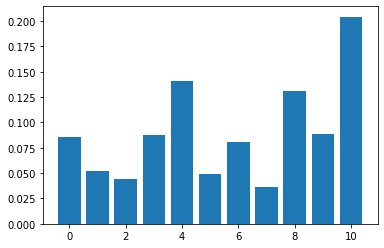

In [81]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: -0.02872
Feature: 1, Score: 0.74603
Feature: 2, Score: 1.09664
Feature: 3, Score: -0.36412
Feature: 4, Score: 0.16502
Feature: 5, Score: -0.15221
Feature: 6, Score: -0.16447
Feature: 7, Score: 1.10003
Feature: 8, Score: -0.00903
Feature: 9, Score: 0.03975
Feature: 10, Score: -0.01927


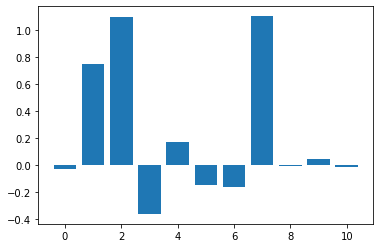

In [82]:
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.00145
Feature: 1, Score: 0.00070
Feature: 2, Score: 0.00055
Feature: 3, Score: 0.00098
Feature: 4, Score: 0.00114
Feature: 5, Score: 0.00020
Feature: 6, Score: -0.00090
Feature: 7, Score: 0.00114
Feature: 8, Score: 0.00078
Feature: 9, Score: 0.00031
Feature: 10, Score: 0.00133


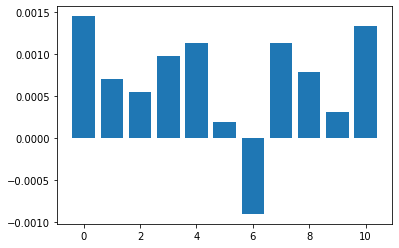

In [83]:
# permutation feature importance with knn for regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature 0: 17.202605
Feature 1: 52.397928
Feature 2: 73.112213
Feature 3: 47.197523
Feature 4: 1.779378
Feature 5: 21.238217
Feature 6: 0.037933
Feature 7: 46.154076
Feature 8: 4.017049
Feature 9: 0.127176
Feature 10: 3.355009


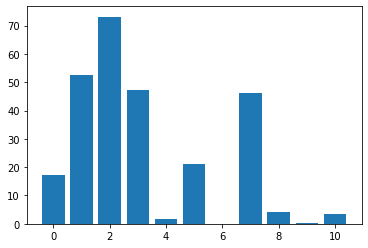

In [84]:
# example of anova f-test feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=4)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 0.027529
Feature 1: 0.009478
Feature 2: 0.004220
Feature 3: 0.007681
Feature 4: 0.005192
Feature 5: 0.025916
Feature 6: 0.000000
Feature 7: 0.006314
Feature 8: 0.005156
Feature 9: 0.000169
Feature 10: 0.000752


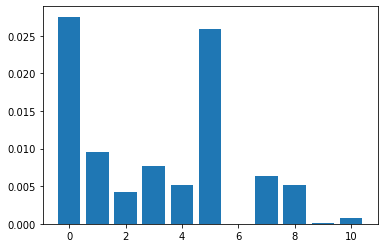

In [85]:
# example of anova f-test feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 12.957785
Feature 1: 46.700832
Feature 2: 67.819112
Feature 3: 10.951410
Feature 4: 1.183022
Feature 5: 17.631609
Feature 6: 0.022248
Feature 7: 15.498749
Feature 8: 2.172323
Feature 9: 0.063106
Feature 10: 2.790695


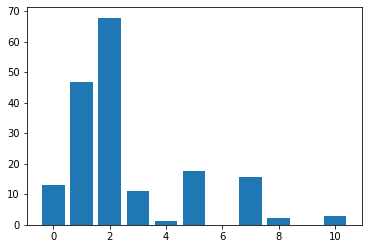

In [86]:
# example of anova f-test feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=chi2, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train_fs, X_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()